In [13]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pickle

In [5]:
texas_df = pd.read_csv('Data/stateData/oneHotDfTexas.csv')
florida_df = pd.read_csv('Data/stateData/oneHotDfFlorida.csv')
new_york_df = pd.read_csv('Data/stateData/oneHotDfNewYork.csv')
illinois_df = pd.read_csv('Data/stateData/oneHotDfIllinois.csv')
north_carolina_df = pd.read_csv('Data/stateData/oneHotDfNC.csv')

In [34]:
detailed_offense = ["murder", "negligent manslaugher", "rape/SA", "robbery", "assault", "other violent", "burglary", "larceny", "motor vehicle theft", "fraud", "other property", "drugs", "public order", "unspecified"]

def train_text_model(df, year, offense):
    # only want rows from 2020 with drug charges
    new_df = df[df['RPTYEAR'] == year]
    new_df = new_df[new_df[offense] == 1]

    # drop columns that are not needed
    new_df = new_df.drop(['RPTYEAR'], axis=1)
    new_df = new_df.drop(detailed_offense, axis=1)
    new_df = new_df.drop(['Unnamed: 0'], axis=1)
    
    # "independent" variables
    feature_cols = list(new_df.columns.values)
    feature_cols.remove('SENTLGTH')

    X = new_df[feature_cols] # Features
    y = new_df['SENTLGTH'] # Target variable

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    return X_train, X_test, y_train, y_test

Average sentence length predicted by model:  1.8683335


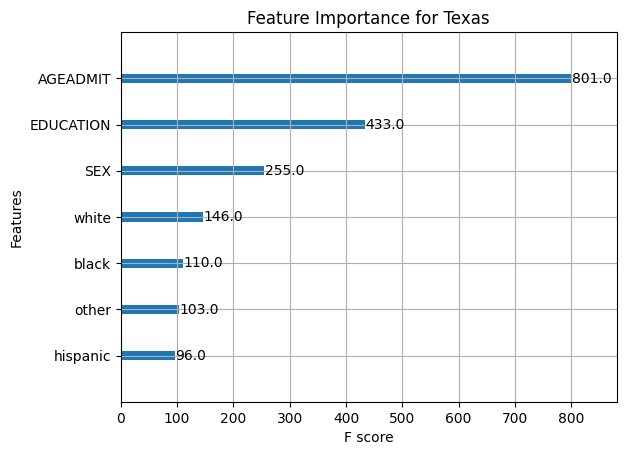

Average sentence length predicted by model:  3.9654446


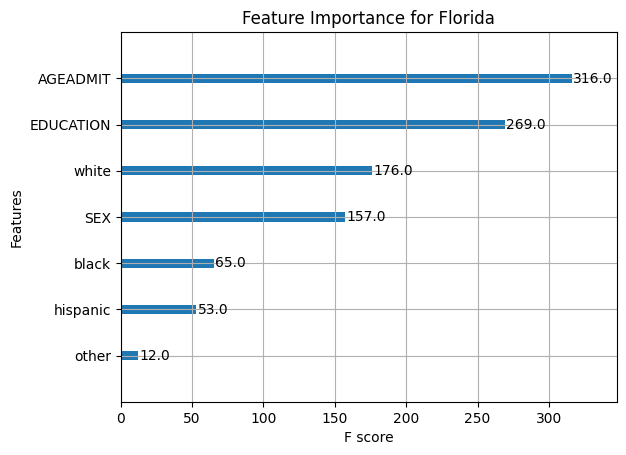

Average sentence length predicted by model:  2.115487


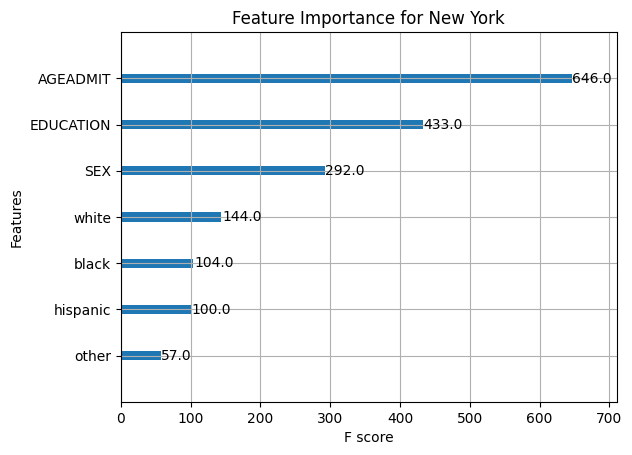

Average sentence length predicted by model:  2.3046994


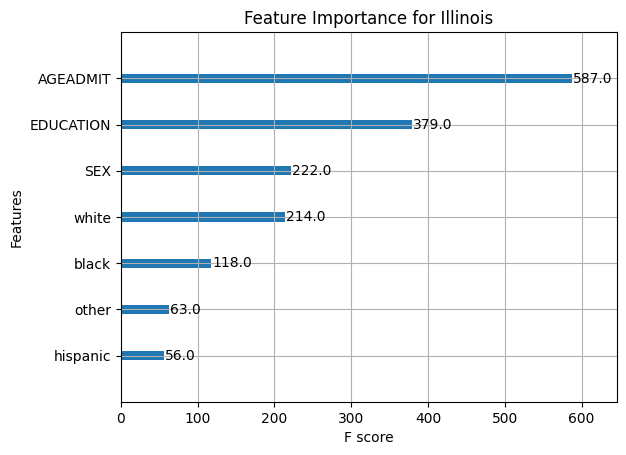

Average sentence length predicted by model:  1.6215677


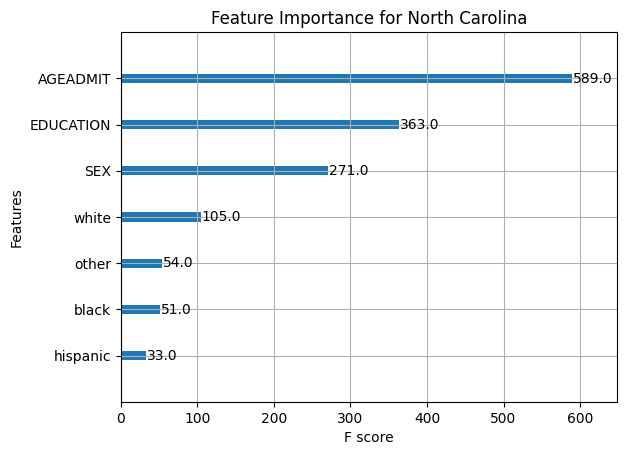

In [36]:
# Gradient Boosting Model
from xgboost import XGBRegressor
from xgboost import plot_importance
feature_importance = []
feature_cols = []
states = ['Texas', 'Florida', 'New York', 'Illinois', 'North Carolina']

for index, state_df in enumerate([texas_df, florida_df, new_york_df, illinois_df, north_carolina_df]):

    feature_cols = list(X_train.columns.values)
    
    X_train, X_test, y_train, y_test = train_text_model(state_df, 2020, "drugs")
    gb = XGBRegressor()
    gb.fit(X_train, y_train)

    gb_y_pred = gb.predict(X_test)

    # print average sentence length predicted by model 
    print("Average sentence length predicted by model: ", np.mean(gb_y_pred))

    # save feature importance
    plot_importance(gb)
    plt.title("Feature Importance for " + states[index])
    plt.show()
